Enter the input image filename:  dice.jpg
Enter the base output image filename (without prefix):  dice3.jpg
Enter the scaling factor (positive number):  15



CUDA output file: cuda_dice3.jpg
OpenMP output file: openmp_dice3.jpg

Running CUDA version...
CUDA Output:
Resizing image from 640x427 to 9600x6405.
Image resizing completed successfully.
Output image saved at: "cuda_dice3.jpg"

CUDA Errors:

CUDA Execution Time: 7.0267 seconds

Running OpenMP version...
OpenMP Output:
Image read: 640x427 with 3 channels.
Upscaled image written to "openmp_dice3.jpg"

OpenMP Errors:

OpenMP Execution Time: 65.0505 seconds

Performance Comparison:
CUDA Execution Time: 7.0267 seconds
OpenMP Execution Time: 65.0505 seconds
CUDA is faster by 58.0238 seconds.


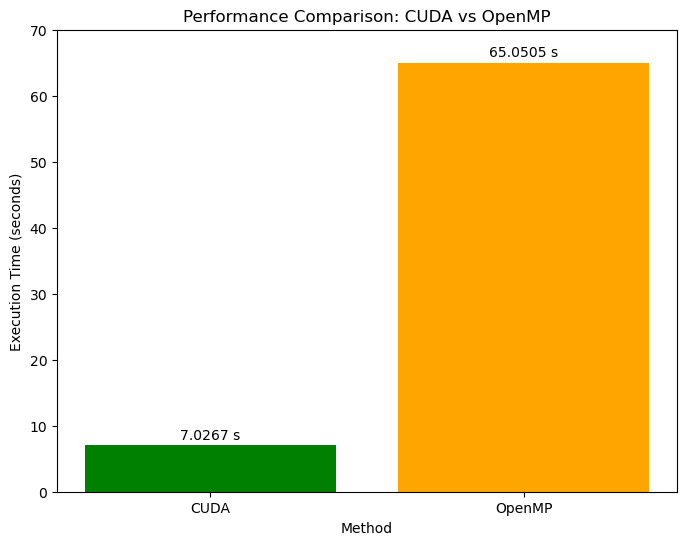

In [5]:
import subprocess
import time
import os
import matplotlib.pyplot as plt

cuda_exe_path = r"C:\Users\user\Desktop\dspc\Assignment\Lanczos-Resampling\Lanczos Cuda\Lanczos\x64\Debug\Lanczos.exe"
openmp_exe_path = r"C:\Users\user\Desktop\dspc\Assignment\Lanczos-Resampling\OpenMP larczos\x64\Debug\OpenMP larczos.exe"

def run_program(exe_path, input_image, output_image, scale_factor):
    """Runs the executable with provided arguments and measures execution time."""
    start_time = time.time()
    try:
        result = subprocess.run(
            [exe_path, input_image, output_image, str(scale_factor)],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        end_time = time.time()
        
        return end_time - start_time, result.stdout, result.stderr
    except Exception as e:
        print(f"Error running {exe_path}: {e}")
        return None, None, None

def main():
    input_image = input("Enter the input image filename: ").strip()
    output_image_base = input("Enter the base output image filename (without prefix): ").strip()
    scale_factor = input("Enter the scaling factor (positive number): ").strip()

    try:
        scale_factor = float(scale_factor)
        if scale_factor <= 0:
            raise ValueError("Scale factor must be positive.")
    except ValueError as e:
        print(f"Invalid scale factor: {e}")
        return
    
    output_image_cuda = os.path.join(os.path.dirname(output_image_base), "cuda_" + os.path.basename(output_image_base))
    output_image_openmp = os.path.join(os.path.dirname(output_image_base), "openmp_" + os.path.basename(output_image_base))

    print(f"\nCUDA output file: {output_image_cuda}")
    print(f"OpenMP output file: {output_image_openmp}\n")

    print("Running CUDA version...")
    cuda_time, cuda_stdout, cuda_stderr = run_program(cuda_exe_path, input_image, output_image_cuda, scale_factor)
    if cuda_time is not None:
        print(f"CUDA Output:\n{cuda_stdout}")
        print(f"CUDA Errors:\n{cuda_stderr}")
        print(f"CUDA Execution Time: {cuda_time:.4f} seconds\n")
    else:
        print("CUDA program failed to execute.\n")

    print("Running OpenMP version...")
    openmp_time, openmp_stdout, openmp_stderr = run_program(openmp_exe_path, input_image, output_image_openmp, scale_factor)
    if openmp_time is not None:
        print(f"OpenMP Output:\n{openmp_stdout}")
        print(f"OpenMP Errors:\n{openmp_stderr}")
        print(f"OpenMP Execution Time: {openmp_time:.4f} seconds\n")
    else:
        print("OpenMP program failed to execute.\n")

    if cuda_time is not None and openmp_time is not None:
        print("Performance Comparison:")
        print(f"CUDA Execution Time: {cuda_time:.4f} seconds")
        print(f"OpenMP Execution Time: {openmp_time:.4f} seconds")

        if cuda_time < openmp_time:
            print(f"CUDA is faster by {openmp_time - cuda_time:.4f} seconds.")
        elif openmp_time < cuda_time:
            print(f"OpenMP is faster by {cuda_time - openmp_time:.4f} seconds.")
        else:
            print("Both programs took the same time.")

    return cuda_time, openmp_time

if __name__ == "__main__":
    cuda_time, openmp_time = main()
    labels = ['CUDA', 'OpenMP']
    times = [cuda_time, openmp_time]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, times, color=['green', 'orange'])

    plt.title('Performance Comparison: CUDA vs OpenMP')
    plt.xlabel('Method')
    plt.ylabel('Execution Time (seconds)')
    plt.ylim(0, openmp_time + 5) 

    for i, time in enumerate(times):
        plt.text(i, time + 0.5, f"{time:.4f} s", ha='center', va='bottom', fontsize=10)

    # Display the graph
    plt.show()
